# Understand DNA sequences

- representation
- data format
- how to process
- Classification problem: Classify the gene family

# What is DNA


> "Deoxyribonucleic Acid (DNA) is a molecule that contains the biological instructions that make each species unique. DNA, along with the instructions it contains, is passed from adult organisms to their offspring during reproduction." -- genome.gov

A human genome has about 6 billion characters or letters ("A", "C", "G", "T").

Everyone has a unique genome. Nevertheless, human share most parts of genomes (alike to each other).

Roles of machine learning:

- capture dependencies in data
- infer new biological hypotheses


--> Need to understand how to interpret a DNA structure and how machine learning algorithms can be used to build a prediction model on DNA sequence data

Ref: https://medium.com/analytics-vidhya/demystify-dna-sequencing-with-machine-learning-and-python-bdbaeb177f56


## How is a DNA Sequence represented?

- Chemical representation: A DNA double helix structure:

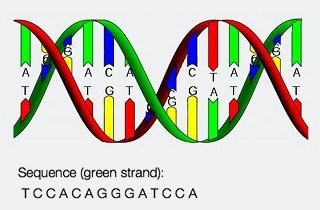


- A nucleotide made of four types of nitrogen bases: **Adenine (A), Thymine (T), Guanine (G) and Cytosine (C).**

- These four chemicals link together via *hydrogen bonds* in any possible order making a chain, and this gives one thread of the DNA double-helix. And the second thread of the double-helix balance the first. (A-T and C-G)

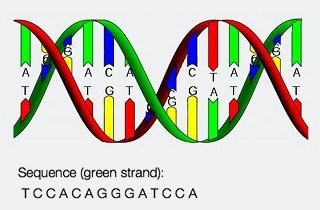

- The order, or sequence, of these bases, determines what biological instructions are contained in a strand of DNA. For example, the sequence ATCGTT might instruct for blue eyes, while ATCGCT might instruct for brown.

## DNA sequence data handling using Python

Python packages: `Biopython` and `squiggle`

- **Biopython** is a collection of python modules that provide functions to deal with DNA, RNA & protein sequence operations such as reverse complementing of a DNA string, finding motifs in protein sequences, etc. It provides a lot of parsers to read all major genetic databases like GenBank, SwissPort, FASTA, etc.,

- **Squiggle** is a software tool that automatically generates interactive web-based two-dimensional graphical representations of raw DNA sequences. Squiggle implements several prior sequence visualization algorithms and introduces novel visualization methods designed to maximize human usability.

In [1]:
!pip install biopython

     |████████████████████████████████| 2.4MB 700kB/s eta 0:00:01


In [2]:
!pip install Squiggle

     |████████████████████████████████| 8.6MB 1.0MB/s eta 0:00:01
     |████████████████████████████████| 112kB 10.2MB/s eta 0:00:01
     |████████████████████████████████| 153kB 9.7MB/s eta 0:00:01
  Stored in directory: /Users/chupi/Library/Caches/pip/wheels/de/64/d0/e7f70919e19f57a6efceb65cc4edaa0449e707bcdb6e7e61ad
  Stored in directory: /Users/chupi/Library/Caches/pip/wheels/58/ea/ee/59d4649b0fb82a0690bdeae834bc85891b306126bcc067e29f
Successfully built bokeh pyfaidx


In [13]:
%matplotlib inline

### DNA sequence format

a file format "fasta": a single line prefixed by the greater than symbol that contains annotations and another line that contains the sequence:

```
AAGGTGAGTGAAATCTCAACACGAGTATGGTTCTGAGAGTAGCTCTGTAACTCTGAGG
```

In [9]:
# read a fasta file
from Bio import SeqIO

for sequence in SeqIO.parse('./data/example.fa', 'fasta'):
    print(sequence.id)
    print(sequence.seq)
    print(len(sequence))

ENST00000435737.5
ATGTTTCGCATCACCAACATTGAGTTTCTTCCCGAATACCGACAAAAGGAGTCCAGGGAATTTCTTTCAGTGTCACGGACTGTGCAGCAAGTGATAAACCTGGTTTATACAACATCTGCCTTCTCCAAATTTTATGAGCAGTCTGTTGTTGCAGATGTCAGCAACAACAAAGGCGGCCTCCTTGTCCACTTTTGGATTGTTTTTGTCATGCCACGTGCCAAAGGCCACATCTTCTGTGAAGACTGTGTTGCCGCCATCTTGAAGGACTCCATCCAGACAAGCATCATAAACCGGACCTCTGTGGGGAGCTTGCAGGGACTGGCTGTGGACATGGACTCTGTGGTACTAAATGAAGTCCTGGGGCTGACTCTCATTGTCTGGATTGACTGA
390
ENST00000419127.5
ATGTTTCGCATCACCAACATTGAGTTTCTTCCCGAATACCGACAAAAGGAGTCCAGGGAATTTCTTTCAGTGTCACGGACTGTGCAGCAAGTGATAAACCTGGTTTATACAACATCTGCCTTCTCCAAATTTTATGAGCAGTCTGTTGTTGCAGATGTCAGCAACAACAAAGGCGGCCTCCTTGTCCACTTTTGGATTGTTTTTGTCATGCCACGTGCCAAAGGCCACATCTTCTGTGAAGACTGTGTTGCCGCCATCTTGAAGGACTCCATCCAGACAAGCATCATAAACCGGACCTCTGTGGGGAGCTTGCAGGGACTGGCTGTGGACATGGACTCTGTGGTACTAAATGACAAAGGCTGCTCTCAGTACTTCTATGCAGAGCATCTGTCTCTCCACTACCCGCTGGAGATTTCTGCAGCCTCAGGGAGGCTGATGTGTCACTTCAAGCTGGTGGCCATAGTGGGCTACCTGATTCGTCTCTCAATCAAGTCCATCCAAATCGAAGCCGACAACTGTGTCACTGACTCCCTGACCATTTACGACTCCCTTTTGCCCATCCGGAGCAG

In [10]:
# visualize the DNA sequences

In [14]:
!Squiggle ./data/example.fa --method=gates

  0%|                                                  | 0/2 [00:00<?, ? seqs/s]BokehDeprecationWarning: 'legend' keyword is deprecated, use explicit 'legend_label', 'legend_field', or 'legend_group' keywords instead


In [17]:
!squiggle ./data/example.fa

  0%|                                                  | 0/2 [00:00<?, ? seqs/s]BokehDeprecationWarning: 'legend' keyword is deprecated, use explicit 'legend_label', 'legend_field', or 'legend_group' keywords instead


## Convert DNA sequences to feature matrices

**k-mer counting**: break a sequence down into k-mer length overlapping "words".

For example, if we use “words” of length 6 (hexamers), “ATGCATGCA” becomes: ‘ATGCAT’, ‘TGCATG’, ‘GCATGC’, ‘CATGCA’

In [18]:
def Kmers_funct(seq, size=4):
    return [seq[x:x+size].lower() for x in range(len(seq) - size + 1)]

In [24]:
my_seq = "GGAAAATGGATTTTGACTGGCATTGTT"
words = Kmers_funct(my_seq, 7)
words

['ggaaaat',
 'gaaaatg',
 'aaaatgg',
 'aaatgga',
 'aatggat',
 'atggatt',
 'tggattt',
 'ggatttt',
 'gattttg',
 'attttga',
 'ttttgac',
 'tttgact',
 'ttgactg',
 'tgactgg',
 'gactggc',
 'actggca',
 'ctggcat',
 'tggcatt',
 'ggcattg',
 'gcattgt',
 'cattgtt']

In [25]:
# join "words" into a 'sentence', then apply any NLP methods to the sentences
joined_sent = ' '.join(words)
joined_sent

'ggaaaat gaaaatg aaaatgg aaatgga aatggat atggatt tggattt ggatttt gattttg attttga ttttgac tttgact ttgactg tgactgg gactggc actggca ctggcat tggcatt ggcattg gcattgt cattgtt'

In [27]:
#for example, Bag-of-Words
mySeq1 = 'TCTCACACATGTGCCAATCACTGTCACCC'
mySeq2 = 'GTGCCCAGGTTCAGTGAGTGACACAGGCAG'
sentence1 = ' '.join(Kmers_funct(mySeq1, size=6))
sentence2 = ' '.join(Kmers_funct(mySeq2, size=6))

from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer()
X = cv.fit_transform([sentence1, sentence2]).toarray()
X

array([[1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1,
        0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0,
        1, 0, 1, 1, 0],
       [0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0,
        1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1,
        0, 1, 0, 0, 1]], dtype=int64)

## Use case: Predicting a gene family

Gene families are groups of related genes that share a common ancestor. Members of gene families may be paralogs or orthologs.

Gene paralogs: genes with similar sequences from within the same species.

Gene orthologs: gene with similar sequences in different species.

## Gene family classes

| Gene Family                 | Class label |
|-----------------------------|-------------|
| G protein coupled receptors | 0           |
| Tyrosine kinase             | 1           |
| Tyrosine phosphatase        | 2           |
| Synthetase                  | 3           |
| Synthase                    | 4           |
| Ion channel                 | 5           |
| Transcription factor        | 6           |


The dataset contains human DNA sequence, Dog DNA sequence, and Chimpanzee DNA sequence.

In [35]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from functools import partial

In [34]:
humandf = pd.read_table('data/human_data.txt')
chimpdf = pd.read_table('data/chimp_data.txt')
dogdf = pd.read_table('data/dog_data.txt')

print(humandf.shape, chimpdf.shape, dogdf.shape)

(4380, 2) (1682, 2) (820, 2)


In [29]:
humandf.head()

,sequence,class
0,ATGCCCCAACTAAATACTACCGTATGGCCCACCATAATTACCCCCA...,4
1,ATGAACGAAAATCTGTTCGCTTCATTCATTGCCCCCACAATCCTAG...,4
2,ATGTGTGGCATTTGGGCGCTGTTTGGCAGTGATGATTGCCTTTCTG...,3
3,ATGTGTGGCATTTGGGCGCTGTTTGGCAGTGATGATTGCCTTTCTG...,3
4,ATGCAACAGCATTTTGAATTTGAATACCAGACCAAAGTGGATGGTG...,3


In [30]:
humandf.groupby('class').count()

,sequence
class,
0,531
1,534
2,349
3,672
4,711
5,240
6,1343


In [33]:
humandf['sequence'].tolist()

['ATGCCCCAACTAAATACTACCGTATGGCCCACCATAATTACCCCCATACTCCTTACACTATTCCTCATCACCCAACTAAAAATATTAAACACAAACTACCACCTACCTCCCTCACCAAAGCCCATAAAAATAAAAAATTATAACAAACCCTGAGAACCAAAATGAACGAAAATCTGTTCGCTTCATTCATTGCCCCCACAATCCTAG',
 'ATGAACGAAAATCTGTTCGCTTCATTCATTGCCCCCACAATCCTAGGCCTACCCGCCGCAGTACTGATCATTCTATTTCCCCCTCTATTGATCCCCACCTCCAAATATCTCATCAACAACCGACTAATCACCACCCAACAATGACTAATCAAACTAACCTCAAAACAAATGATAACCATACACAACACTAAAGGACGAACCTGATCTCTTATACTAGTATCCTTAATCATTTTTATTGCCACAACTAACCTCCTCGGACTCCTGCCTCACTCATTTACACCAACCACCCAACTATCTATAAACCTAGCCATGGCCATCCCCTTATGAGCGGGCACAGTGATTATAGGCTTTCGCTCTAAGATTAAAAATGCCCTAGCCCACTTCTTACCACAAGGCACACCTACACCCCTTATCCCCATACTAGTTATTATCGAAACCATCAGCCTACTCATTCAACCAATAGCCCTGGCCGTACGCCTAACCGCTAACATTACTGCAGGCCACCTACTCATGCACCTAATTGGAAGCGCCACCCTAGCAATATCAACCATTAACCTTCCCTCTACACTTATCATCTTCACAATTCTAATTCTACTGACTATCCTAGAAATCGCTGTCGCCTTAATCCAAGCCTACGTTTTCACACTTCTAGTAAGCCTCTACCTGCACGACAACACATAA',
 'ATGTGTGGCATTTGGGCGCTGTTTGGCAGTGATGATTGCCTTTCTGTTCAGTGTCTGAGTGCTATGAAGATTGCACACAGAGGTCCAGATGCATTCCGTT

In [39]:

def sentencize(df):
    '''Generate a df into kmers sentences and target vectors'''
    seq_list = df['sequence'].tolist()
    y_gt = df['class'].tolist()
    
    # apply Kmer-counting to seq-list
    kmers_list = map(partial(Kmers_funct, size=6), seq_list) #k-mer words of length 6
    sentences = [' '.join(seq) for seq in kmers_list]
    return sentences, y_gt


In [41]:
sents_human, y_human = sentencize(humandf)

#check one data
sents_human[0]


'atgccc tgcccc gcccca ccccaa cccaac ccaact caacta aactaa actaaa ctaaat taaata aaatac aatact atacta tactac actacc ctaccg taccgt accgta ccgtat cgtatg gtatgg tatggc atggcc tggccc ggccca gcccac cccacc ccacca caccat accata ccataa cataat ataatt taatta aattac attacc ttaccc tacccc accccc ccccca ccccat cccata ccatac catact atactc tactcc actcct ctcctt tcctta ccttac cttaca ttacac tacact acacta cactat actatt ctattc tattcc attcct ttcctc tcctca cctcat ctcatc tcatca catcac atcacc tcaccc caccca acccaa cccaac ccaact caacta aactaa actaaa ctaaaa taaaaa aaaaat aaaata aaatat aatatt atatta tattaa attaaa ttaaac taaaca aaacac aacaca acacaa cacaaa acaaac caaact aaacta aactac actacc ctacca taccac accacc ccacct caccta acctac cctacc ctacct tacctc acctcc cctccc ctccct tccctc ccctca cctcac ctcacc tcacca caccaa accaaa ccaaag caaagc aaagcc aagccc agccca gcccat cccata ccataa cataaa ataaaa taaaaa aaaaat aaaata aaataa aataaa ataaaa taaaaa aaaaaa aaaaat aaaatt aaatta aattat attata ttataa tataac ataaca taacaa aacaaa acaaa

In [44]:
#vectorize using BOW
tf = CountVectorizer(ngram_range=(4,4)) # 4-gram 
x_human = tf.fit_transform(sents_human)


In [45]:
print(x_human.shape)


(4380, 232414)
(1682, 232414)
(820, 232414)


In [50]:
#using human data for training
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x_human, y_human, test_size=0.2, random_state=42)

x_train

<3504x232414 sparse matrix of type '<class 'numpy.int64'>'
	with 4318484 stored elements in Compressed Sparse Row format>

## Classifiers

### 1. Multinomial Naive Bayes

In [54]:
from sklearn.naive_bayes import MultinomialNB

#create a model
clf_bayes = MultinomialNB(alpha=0.1)

#train on data
clf_bayes.fit(x_train, y_train)


MultinomialNB(alpha=0.1, class_prior=None, fit_prior=True)

In [55]:
#prediction on test
y_pred = clf_bayes.predict(x_test)

In [70]:
#look at model performance: confusion matrix, accuracy, precision, recall, f1 score

from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score

print("Confusion matrix for predictions on human test DNA sequence\n")
print(pd.crosstab(pd.Series(y_test, name='Actual'), pd.Series(y_pred, name='Predicted')))

def calculate_metrics(y_test, y_predicted):
    accuracy = accuracy_score(y_test, y_predicted)
    precision = precision_score(y_test, y_predicted, average='weighted')
    recall = recall_score(y_test, y_predicted, average='weighted')
    f1 = f1_score(y_test, y_predicted, average='weighted')
    print("accuracy = %.3f \nprecision = %.3f \nrecall = %.3f \nf1 = %.3f" % (accuracy, precision, recall, f1))

calculate_metrics(y_test, y_pred)

Confusion matrix for predictions on human test DNA sequence

Predicted   0    1   2    3    4   5    6
Actual                                   
0          99    0   0    0    1   0    2
1           0  104   0    0    0   0    2
2           0    0  78    0    0   0    0
3           0    0   0  124    0   0    1
4           1    0   0    0  143   0    5
5           0    0   0    0    0  51    0
6           1    0   0    1    0   0  263
accuracy = 0.984 
precision = 0.984 
recall = 0.984 
f1 = 0.984


### 2. Support vector machines

In [76]:
from sklearn import svm

clf_svm = svm.SVC(C=100, gamma=0.001, kernel='rbf')

#train
clf_svm.fit(x_train, y_train)

#predict and eval
calculate_metrics(y_test, clf_svm.predict(x_test))

accuracy = 0.893 
precision = 0.921 
recall = 0.893 
f1 = 0.896


### 3. XGBoost

In [82]:
XGBClassifier??

In [93]:
from xgboost import XGBClassifier

clf_xgb = XGBClassifier(
            max_depth=5, 
            learning_rate=0.051,
            n_estimators=100,
            objective='multi:softmax',
            num_class=7
)
clf_xgb.fit(x_train, y_train)

y_pred = clf_xgb.predict(x_test)
y_pred = [round(value) for value in y_pred]
calculate_metrics(y_test, y_pred)


accuracy = 0.775 
precision = 0.849 
recall = 0.775 
f1 = 0.781


### Predicting DNA sequences from other species


In [78]:
sents_chimp, y_chimp = sentencize(chimpdf)
sents_dog, y_dog = sentencize(dogdf)

x_chimp = tf.transform(sents_chimp)
x_dog = tf.transform(sents_dog)

print(x_chimp.shape)
print(x_dog.shape)


(1682, 232414)
(820, 232414)


In [86]:
def evaluate_classifier(model):
    #predict
    y_pred_chimp = model.predict(x_chimp)
    y_pred_dog = model.predict(x_dog)
    #eval
    print("Performance on Chimpanzee test DNA")
    calculate_metrics(y_chimp, y_pred_chimp)

    print("----\nPerformance on Dog test DNA")
    calculate_metrics(y_dog, y_pred_dog)

In [87]:
#naive bayes
evaluate_classifier(clf_bayes)

Performance on Chimpanzee test DNA
accuracy = 0.993 
precision = 0.994 
recall = 0.993 
f1 = 0.993
----
Performance on Dog test DNA
accuracy = 0.926 
precision = 0.934 
recall = 0.926 
f1 = 0.925


|||--> the model seems to produce good results on human data. It also does on Chimpanzee which is because the Chimpanzee and humans share the same genetic hierarchy. The performance on the dog is not quite as good which is because the dog is more diverging from humans than the chimpanzee. 

In [88]:
#SVM
evaluate_classifier(clf_svm)

Performance on Chimpanzee test DNA
accuracy = 0.968 
precision = 0.971 
recall = 0.968 
f1 = 0.969
----
Performance on Dog test DNA
accuracy = 0.493 
precision = 0.803 
recall = 0.493 
f1 = 0.436


In [94]:
#Xgboost
evaluate_classifier(clf_xgb)

Performance on Chimpanzee test DNA
accuracy = 0.891 
precision = 0.911 
recall = 0.891 
f1 = 0.893
----
Performance on Dog test DNA
accuracy = 0.596 
precision = 0.640 
recall = 0.596 
f1 = 0.578
